# Caricamento dei dati

## Cosa impareremo

* I file CSV
* Caricare un file CSV direttamente da Internet
    * Dati internazionali dal repository Johns Hopkins CSSE
    * Dati italiani dal repository della Protezione Civile
* Visualizzare e manipolare le tabelle di dati
* Produrre semplici grafici dei dati

## Dati internazionali

Caricamento dei dati COVID internazionali.
I dati si trovano su github nel repository: https://github.com/CSSEGISandData/COVID-19

### Definizioni dei file

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mondo_URL_base = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
file_confermati = 'time_series_covid19_confirmed_global.csv'
file_morti = 'time_series_covid19_deaths_global.csv'
file_guariti = 'time_series_covid19_recovered_global.csv'

Questi file sono di tipo "CSV", che significa "Comma-Separated-Values", cioè valori separati da una virgola. È il modo più semplice ed universale per rappresentare dati tabulari come quelli che ci interessano, anche se non il pi compatto. Però ha il vantaggio di essere facilmente interpretabile dagli umani e non solo dalle macchine.

### Caricamento dati

Carichiamo ora i dati internazionali dei confermati.

In [106]:
confermati_mondo = pd.read_csv(mondo_URL_base + file_confermati, index_col = 'Country/Region').sort_index()

In [55]:
# Visualizzazione di un dataframe - utilizza il motore interno di rappresentazione
confermati_mondo

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.0000,65.0000,0,0,0,0,0,0,0,...,94,110,110,120,170,174,237,273,281,299
Albania,NaN,41.1533,20.1683,0,0,0,0,0,0,0,...,174,186,197,212,223,243,259,277,304,333
Algeria,NaN,28.0339,1.6596,0,0,0,0,0,0,0,...,367,409,454,511,584,716,847,986,1171,1251
Andorra,NaN,42.5063,1.5218,0,0,0,0,0,0,0,...,224,267,308,334,370,376,390,428,439,466
Angola,NaN,-11.2027,17.8739,0,0,0,0,0,0,0,...,4,4,5,7,7,7,8,8,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,NaN,6.4238,-66.5897,0,0,0,0,0,0,0,...,107,107,119,119,135,135,143,146,153,155
Vietnam,NaN,16.0000,108.0000,0,2,2,2,2,2,2,...,153,163,174,188,203,212,218,233,237,240
West Bank and Gaza,NaN,31.9522,35.2332,0,0,0,0,0,0,0,...,84,91,98,109,116,119,134,161,194,217


### Trattamento dei dati

Elaboriamo i dati in modo da ottenere solo le informazioni che ci interessano. In questo caso, rimuoviamo le colonne che non servono

In [107]:
confermati_mondo.drop(columns = ['Province/State', 'Lat', 'Long'], inplace=True)

In [108]:
confermati_mondo

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,94,110,110,120,170,174,237,273,281,299
Albania,0,0,0,0,0,0,0,0,0,0,...,174,186,197,212,223,243,259,277,304,333
Algeria,0,0,0,0,0,0,0,0,0,0,...,367,409,454,511,584,716,847,986,1171,1251
Andorra,0,0,0,0,0,0,0,0,0,0,...,224,267,308,334,370,376,390,428,439,466
Angola,0,0,0,0,0,0,0,0,0,0,...,4,4,5,7,7,7,8,8,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0,0,0,0,0,0,0,0,0,0,...,107,107,119,119,135,135,143,146,153,155
Vietnam,0,2,2,2,2,2,2,2,2,2,...,153,163,174,188,203,212,218,233,237,240
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,84,91,98,109,116,119,134,161,194,217


### Estrazione dei dati per paese

Estraiamo adesso i dati del paese che ci interessa. La funzione ```loc``` permette di selezionare la riga (o le righe) del dataset che hanno un particolare indice.

In [45]:
paese = 'Italy'
confermati_paese = confermati_mondo.loc[paese]
confermati_paese

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
            ...  
3/31/20    105792
4/1/20     110574
4/2/20     115242
4/3/20     119827
4/4/20     124632
Name: Italy, Length: 74, dtype: int64

Alcuni paesi come la Cina sono divisi in diverse province, quindi la stessa tecnica non dà il risultato desiderato.

In [46]:
paese = 'China'
confermati_paese = confermati_mondo.loc[paese]
confermati_paese

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
China,1,9,15,39,60,70,106,152,200,237,...,990,990,990,990,990,990,990,990,990,990
China,14,22,36,41,68,80,91,111,114,139,...,566,569,573,577,577,580,580,582,584,585
China,6,9,27,57,75,110,132,147,182,211,...,578,578,578,579,579,579,579,579,579,579
China,1,5,10,18,35,59,80,84,101,120,...,328,331,337,338,340,343,345,345,349,350
China,0,2,2,4,7,14,19,24,26,29,...,136,136,136,138,138,138,138,138,138,138
China,26,32,53,78,111,151,207,277,354,436,...,1448,1456,1467,1475,1484,1494,1501,1507,1514,1516
China,2,5,23,23,36,46,51,58,78,87,...,254,254,254,254,254,254,254,254,254,254
China,1,3,3,4,5,7,9,9,12,29,...,146,146,146,146,146,146,146,146,146,146
China,4,5,8,19,22,33,40,43,46,52,...,168,168,168,168,168,168,168,168,168,168


Per ottenere il valore di tutta la Cina, dobbiamo sommare le varie righe tra di loro. Questo viene fatto con la funzione ```sum```

In [47]:
paese = 'China'
confermati_paese = confermati_mondo.loc[paese].sum()
confermati_paese

1/22/20      548
1/23/20      643
1/24/20      920
1/25/20     1406
1/26/20     2075
           ...  
3/31/20    82279
4/1/20     82361
4/2/20     82432
4/3/20     82511
4/4/20     82543
Length: 74, dtype: int64

Come vedete, otteniamo un risultato simile al precedente.

Possiamo già fare una prima visualizzazione di questi dati, semplicemente riportando su una linea l'andamento temporale dei casi confermati. Qua sotto mettiamo insieme i comandi precedenti. Modificando il valore della variabile ```paese``` possiamo ottenere grafici diversi.

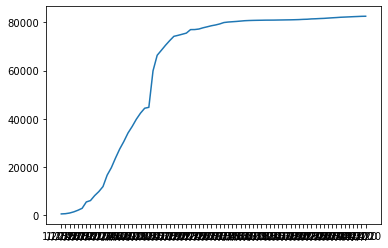

In [48]:
paese = 'China'
confermati_paese = confermati_mondo.loc[paese]

# per avere una implementazione generale, controlliamo se i dati riportati sono una lista o una tabella
if len(confermati_paese.shape) == 2:
    confermati_paese = confermati_paese.sum()

confermati_paese
plt.plot(confermati_paese)

Per rendere il risultato più generale, definiamo una funzione che ci permetta di evitare di scrivere ogni volta la sequenza di comandi precedente.

In [49]:
def dati_paese(dati, paese):
    dati_uscita = dati.loc[paese]
    if len(dati_uscita.shape) == 2:
        dati_uscita = dati_uscita.sum()
    return dati_uscita

Così possiamo estrarre i dati per il paese che ci interessa utilizzando la funzione:

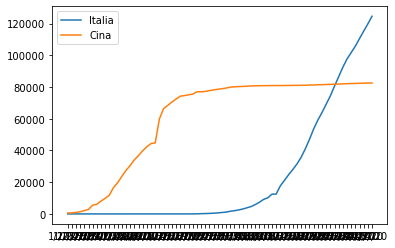

In [50]:
confermati_italia = dati_paese(confermati_mondo, 'Italy')
confermati_cina = dati_paese(confermati_mondo, 'China')

plt.plot(confermati_italia, label='Italia')
plt.plot(confermati_cina, label='Cina')
plt.legend()

### Altri dati: morti e guarigioni

Possiamo adesso caricare i dati anche delle morti e delle guarigioni:

In [68]:
morti_mondo = pd.read_csv(mondo_URL_base + file_morti, index_col = 'Country/Region').sort_index().drop(columns = ['Province/State', 'Lat', 'Long'])
guariti_mondo = pd.read_csv(mondo_URL_base + file_guariti, index_col = 'Country/Region').sort_index().drop(columns = ['Province/State', 'Lat', 'Long'])

Possiamo usare la funzione dati_paese definita prima anche per estrarre i dati da queste nuove tabelle

In [75]:
morti_italia = dati_paese(morti_mondo, 'Italy')
morti_cina = dati_paese(morti_mondo, 'China')

guariti_italia = dati_paese(guariti_mondo, 'Italy')
guariti_cina = dati_paese(guariti_mondo, 'China')

Visualizziamo adesso i confermati, i morti e i guariti.

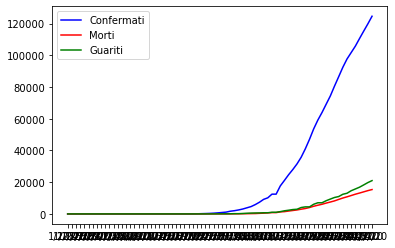

In [79]:
plt.plot(confermati_italia, 'b', label='Confermati')
plt.plot(morti_italia, 'r', label='Morti')
plt.plot(guariti_italia, 'g', label='Guariti')
plt.legend()

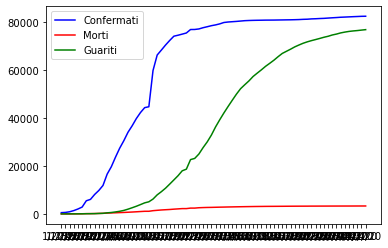

In [80]:
plt.plot(confermati_cina, 'b', label='Confermati')
plt.plot(morti_cina, 'r', label='Morti')
plt.plot(guariti_cina, 'g', label='Guariti')
plt.legend()

## Dati nazionali italiani

I dati nazionali italiani si trovano sul repository github della protezione civile: https://github.com/pcm-dpc/COVID-19

Nel nostro caso ci interessano i dati per regione. Il formato di questi dati è diverso dal formato di Johns Hopkins, visto che abbiamo un file CSV per ogni giorno con tutte le regioni e tutti i dati (confermati, morti, guarigioni) insieme.

Il nome di questi file è del tipo  ```dpc-covid19-ita-regioni-XXXXXXXX.csv``` dove le XX rappresentano una data. Per leggere tutti i file useremo un ciclo while e le funzioni datetime e timedelta di python.

In [100]:
import datetime

italia_URL_base = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/'
formato_file_gioraliero = 'dpc-covid19-ita-regioni-%Y%m%d.csv'

data_inizio = datetime.date(2020,2,24) # inizio il 24 febbraio 2020

lista_dati = []

data_corrente = data_inizio
while data_corrente < datetime.date.today():
    file = data_corrente.strftime(formato_file_gioraliero)
    print(f'Lettura di {file}')
    lista_dati.append(pd.read_csv(italia_URL_base + file, index_col=['denominazione_regione', 'data']).sort_index())
    data_corrente += datetime.timedelta(days=1) # aggiunge un giorno alla data considerata
    
dati_italia_per_regione = pd.concat(lista_dati) # Aggrega i dati
print('Fatto')

Lettura di dpc-covid19-ita-regioni-20200224.csv
Lettura di dpc-covid19-ita-regioni-20200225.csv
Lettura di dpc-covid19-ita-regioni-20200226.csv
Lettura di dpc-covid19-ita-regioni-20200227.csv
Lettura di dpc-covid19-ita-regioni-20200228.csv
Lettura di dpc-covid19-ita-regioni-20200229.csv
Lettura di dpc-covid19-ita-regioni-20200301.csv
Lettura di dpc-covid19-ita-regioni-20200302.csv
Lettura di dpc-covid19-ita-regioni-20200303.csv
Lettura di dpc-covid19-ita-regioni-20200304.csv
Lettura di dpc-covid19-ita-regioni-20200305.csv
Lettura di dpc-covid19-ita-regioni-20200306.csv
Lettura di dpc-covid19-ita-regioni-20200307.csv
Lettura di dpc-covid19-ita-regioni-20200308.csv
Lettura di dpc-covid19-ita-regioni-20200309.csv
Lettura di dpc-covid19-ita-regioni-20200310.csv
Lettura di dpc-covid19-ita-regioni-20200311.csv
Lettura di dpc-covid19-ita-regioni-20200312.csv
Lettura di dpc-covid19-ita-regioni-20200313.csv
Lettura di dpc-covid19-ita-regioni-20200314.csv
Lettura di dpc-covid19-ita-regioni-20200

Visualizziamo ora i dati aggregati.

In [101]:
dati_italia_per_regione

,,stato,codice_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
denominazione_regione,data,,,,,,,,,,,,,,,,,
Abruzzo,2020-02-24T18:00:00,ITA,13,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0,5,NaN,NaN
Basilicata,2020-02-24T18:00:00,ITA,17,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
Calabria,2020-02-24T18:00:00,ITA,18,38.905976,16.594402,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN
Campania,2020-02-24T18:00:00,ITA,15,40.839566,14.250850,0,0,0,0,0,0,0,0,0,0,10,NaN,NaN
Emilia-Romagna,2020-02-24T18:00:00,ITA,8,44.494367,11.341721,10,2,12,6,18,0,18,0,0,18,148,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sicilia,2020-04-04T17:00:00,ITA,19,38.115697,13.362357,553,74,627,1099,1726,62,73,95,111,1932,19896,NaN,NaN
Toscana,2020-04-04T17:00:00,ITA,9,43.769231,11.255889,1129,286,1415,3639,5054,145,172,310,307,5671,47886,NaN,NaN
Umbria,2020-04-04T17:00:00,ITA,10,43.106758,12.388247,167,44,211,716,927,7,31,242,41,1210,11809,NaN,NaN


Definiamo ora una funzione per ottenere dati simili a come ottenevamo con il dataset di prima.

In [104]:
def dati_regione(regione):
    confermati = dati_italia_per_regione.loc[regione]['totale_casi'] # seleziona le righe "Regione" e la colonna "totale_positivi"
    guariti = dati_italia_per_regione.loc[regione]['dimessi_guariti']
    morti = dati_italia_per_regione.loc[regione]['deceduti']
    return confermati, guariti, morti

Visualizziamo ora i dati per tre regioni italiane.

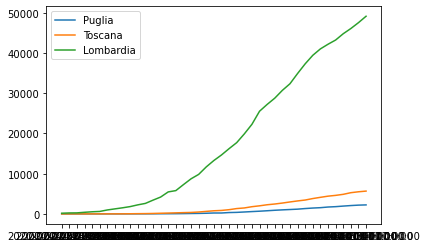

In [105]:
confermati_puglia, guariti_puglia, morti_puglia = dati_regione('Puglia')
confermati_toscana, guariti_toscana, morti_toscana = dati_regione('Toscana')
confermati_lombardia, guariti_lombardia, morti_lombardia = dati_regione('Lombardia')

plt.plot(confermati_puglia, label='Puglia')
plt.plot(confermati_toscana, label='Toscana')
plt.plot(confermati_lombardia, label='Lombardia')
plt.legend()


# Cosa abbiamo imparato

* Struttura dei file CSV
* Leggere i file CSV con pandas
* Manipolare le tabelle di pandas (ordinare i dati, rimuovere colonne con ```drop```)
* Estrarre dati da una tabella con ```loc[]```
* Visualizzare i dati con ```plt.plot()```
* Leggere dati da file multiple in maniera automatizzata
* Aggregare varie tabelle di dati

# La prossima settimana

* Manipolazione dei dati (calcolo delle variazioni)
* Visualizzazioni avanzate (scala logaritmica, diagrammi a barre, altre rappresentazioni)